# Imports

In [46]:
import igraph as ig
import numpy as np
import matplotlib.pyplot as plt
import random
from collections import Counter
from scipy.stats import linregress


# Question 2: Generative Graph Models & Genetic Encodings

## Part 1

### Helpers

In [47]:
import numpy as np

def generate_nodes(b):
    N = 2**b
    return [format(i, f'0{b}b') for i in range(N)]

def matches(node, pattern):    
    return all(p == 'X' or p == n for n, p in zip(node, pattern))

def get_indices(nodes, pattern):    
    return [idx for idx, node in enumerate(nodes) if matches(node, pattern)]

def build_adjacency_matrix(b):
    nodes = generate_nodes(b)
    N = len(nodes)
    adj = np.zeros((N, N), dtype=int)
    for i in range(b + 1):
        Si = '0'*i + 'X'*(b-i)
        Di = 'X'*i + '1'*(b-i)
        sources = get_indices(nodes, Si)
        destinations = get_indices(nodes, Di)
        for s in sources:
            for d in destinations:
                adj[s, d] = 1
    return adj


In [51]:
def plot_degree_distribution(degrees, title):
    degrees = np.array(degrees)
    
    counts = Counter(degrees)
    k_values = np.array(list(counts.keys()))
    P_k = np.array(list(counts.values())) / len(degrees)      
    sorted_idx = np.argsort(k_values)
    k_values = k_values[sorted_idx]
    P_k = P_k[sorted_idx]
     
    plt.figure(figsize=(6,4))
    plt.loglog(k_values, P_k, 'o', markersize=4, label='Data')    
    log_x = np.log10(k_values)
    log_y = np.log10(P_k)
    slope, intercept, r_value, p_value, std_err = linregress(log_x, log_y)
    
    plt.loglog(k_values, 10**intercept * k_values**slope, 'r--', label=f'Fit: slope={slope:.2f}')
    
    plt.title(title)
    plt.xlabel("Degree k")
    plt.ylabel("P(k)")
    plt.legend()
    plt.show()
    
    return slope


### Simulations

In [53]:
b = 10
adj_matrix = build_adjacency_matrix(b)
in_deg = np.sum(adj_matrix, axis=0)
out_deg = np.sum(adj_matrix, axis=1)

print(adj_matrix)
print(in_deg)
print(out_deg)

[[1 1 1 ... 1 1 1]
 [0 1 0 ... 1 0 1]
 [0 0 0 ... 0 0 1]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]]
[   1    2    1 ...    2    1 1024]
[1024  512  256 ...    1    1    1]


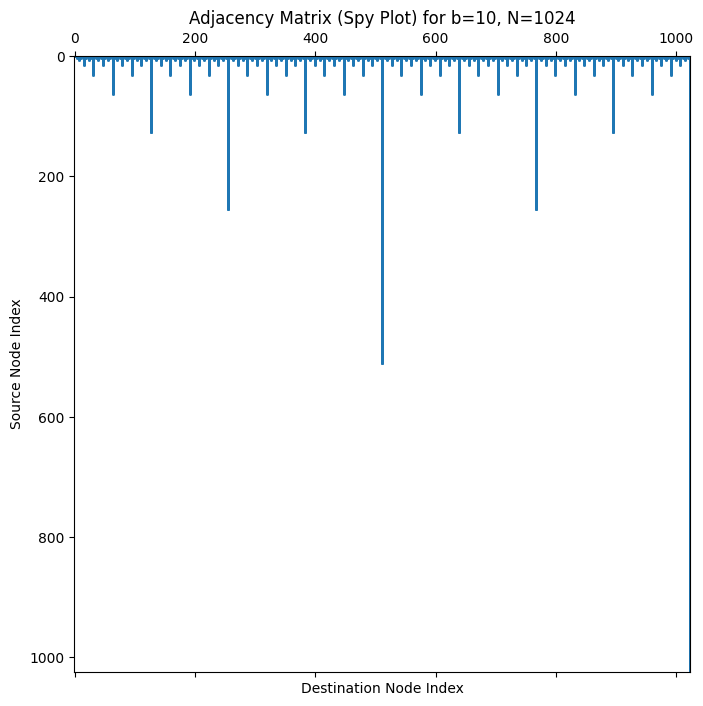

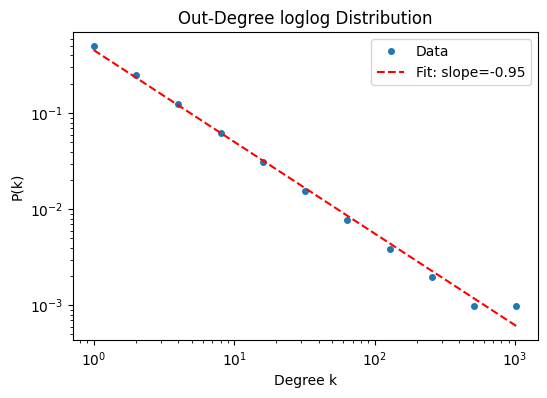

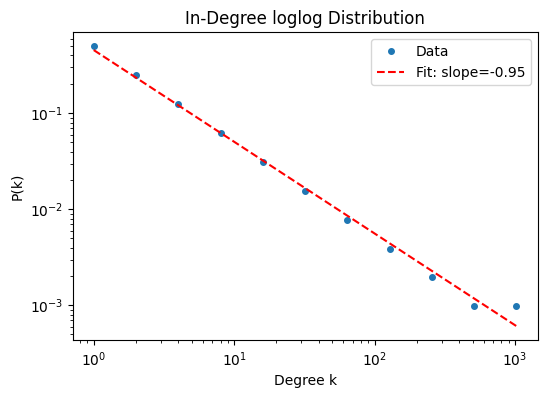

Estimated power-law exponent y (out-degree) ≈ 0.95
Estimated power-law exponent y (in-degree) ≈ 0.95


In [54]:
plt.figure(figsize=(8,8))
plt.spy(adj_matrix, markersize=1)
plt.title("Adjacency Matrix (Spy Plot) for b=10, N=1024")
plt.xlabel("Destination Node Index")
plt.ylabel("Source Node Index")
plt.show()

gamma_out = -plot_degree_distribution(out_deg, "Out-Degree loglog Distribution")
gamma_in = -plot_degree_distribution(in_deg, "In-Degree loglog Distribution")

print(f"Estimated power-law exponent y (out-degree) ≈ {gamma_out:.2f}")
print(f"Estimated power-law exponent y (in-degree) ≈ {gamma_in:.2f}")
